![Texte alternatif…](https://eumas2017.ibisc.univ-evry.fr/img/ueve.jpg)


# **Ayoub Abraich**


# Projet de Machine Learning : NLP & Analyse Sentimnetal sur IMDB  


## Plan :
- Prétraitement des données
- Analyse Sentimnetal en utilisant Bags Of Words & Random forest
- Analyse Sentimnetal avec le deep learning





Afin d'éviter les erreurs d'importation des packages , j'ai utilisé Google Colab .

 ### Import des packages

In [41]:
import warnings
warnings.filterwarnings("ignore") 

import pandas as pd
import numpy as np
import re


import nltk    
nltk.download('stopwords')
  
from nltk.corpus import stopwords                   #Stopwords corpus
from keras.preprocessing.sequence import pad_sequences

from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.preprocessing import sequence


from __future__ import absolute_import, division, print_function

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

import tensorflow as tf
from tensorflow import keras

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Prétraitement des données


### Analyse Sentimnetal en utilisant Bags Of Words & Random forest 


In [10]:

#  Lecture des données
data_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/labeledTrainData.tsv',delimiter = "\t")
data_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/testData.tsv', delimiter = "\t")


############### Preprocessing : Data_train #########################

def reviewWords(review):
    data_train_Exclude_tags = re.sub(r'<[^<>]+>', " ", review)      # Exclure les balises HTML
    data_train_num = re.sub(r'[0-9]+', 'number', data_train_Exclude_tags)  # Conversion de nombres en "NUMBER"
    data_train_lower = data_train_num.lower()              # Conversion en minuscule.
    data_train_split = data_train_lower.split()            # Diviser en mots individuels
    stopWords = set(stopwords.words("english") )

    meaningful_words = [w for w in data_train_split if not w in stopWords]     # Supprimer les stop words.
    
    return( " ".join( meaningful_words ))   

# Nettoyage de données et traitement de texte.
cleanWords = []
for i in range(data_train['review'].size):
    cleanWords.append( reviewWords( data_train["review"][i] ))
print("--- Preprocessing de Data_train terminé ! ---\n")

# Creation des  features à partir des bags of words.
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 5000)
data_train_features = vectorizer.fit_transform(cleanWords).toarray()
print("--- Train Features crées ! --- \n")

--- Preprocessing de Data_train terminé ! ---

--- Train Features crées ! --- 



In [11]:
############### Preprocessing : Data_test #########################
# Traitons toutes les revues de test ensemble.
testcleanWords = []
for i in range(data_test['review'].size):
    testcleanWords.append( reviewWords( data_test["review"][i] ))
print("--- Preprocessing de Data_test terminé ! ---\n")

# Créer des features à partir de bags of words.
data_test_features = vectorizer.transform(testcleanWords).toarray()
print("--- Test Features crées !--- \n")





--- Preprocessing de Data_test terminé ! ---

--- Test Features crées !--- 



In [0]:

#################### Fonction : pred qui retourne les valeurs prédites + le score de prédiciton ##########

def pred(data_train_features,data_train,data_test_features,data_test,clf,hyp):
     # Apprentissage
    print("Entraîner le classificateur :\n")
    classifier = clf(n_estimators = hyp)
    fit = classifier.fit(data_train_features, data_train["sentiment"])
    print("......... : Done ! \n")

    score_train = classifier.score(data_train_features, data_train["sentiment"])

    print("Score_train: %f" %(score_train))
    # Predictions.
    result = classifier.predict(data_test_features)
    score_test = classifier.score(data_test_features, result)
    print("Score_test: %f" %(score_test))

    # Mettre les valeurs prédites dans un data frame avec une colonne id et une colonne de sentiments.(0/1)
    output = pd.DataFrame(data = {"id": data_test["id"], "sentiment": result} )
    return output
  

In [13]:
############# Classifieur = Random Forest ################

clf1=RandomForestClassifier
hyp1=100

pred(data_train_features,data_train,data_test_features,data_test,clf1,hyp1)

Entraîner le classificateur :

......... : Done ! 

Score_train: 1.000000
Score_test: 1.000000


,id,sentiment
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,1
4,12128_7,1
5,2913_8,0
6,4396_1,0
7,395_2,1
8,10616_1,0
9,9074_9,0


Maintenant , on va importer les données IMDB déja hachées disponible sur Keras afin de classifier les reviews en utilisant deep learning .

# Deep learning

## Import des données haché**e**s

Jeu de données de 25 000 critiques de films de IMDB, étiqueté par sentiment (positif / négatif). Les revues ont été prétraitées et chaque critique est codée sous forme d'une séquence d'index de mots (entiers). Pour plus de commodité, les mots sont indexés par fréquence globale dans l'ensemble de données, de sorte que, par exemple, l'entier "3" code le troisième mot le plus fréquent dans les données. Cela permet des opérations de filtrage rapides telles que: "ne considérez que les 10 000 mots les plus communs, mais éliminez les 20 mots les plus courants".

In [14]:
vocab_size = 10000 #vocab size

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

17465344/17464789 [==============================] - 0s 0us/step


L'argument num_words = 10000 conserve les 10 000 mots les plus fréquents dans les données d'apprentissage. Les mots rares sont supprimés pour que la taille des données reste gérable.


## Exploration des données


Prenons un moment pour comprendre le format des données. L'ensemble de données est prétraité: chaque exemple est un tableau d'entiers représentant les mots de la critique du film. Chaque étiquette est une valeur entière égale à 0 ou 1, 0 étant un avis négatif et 1 un avis positif.


In [15]:
print("Entrées d'apprentissage: {}, labels: {}".format(len(train_data), len(train_labels)))


Entrées d'apprentissage: 25000, labels: 25000


Le texte des critiques a été converti en nombres entiers, chaque nombre entier représentant un mot spécifique dans un dictionnaire. Voici à quoi ressemble le premier commentaire:


In [16]:
print(train_data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Les critiques de films peuvent être de différentes longueurs. Le code ci-dessous indique le nombre de mots dans les première et deuxième évaluations. Comme les entrées dans un réseau de neurones doivent avoir la même longueur, nous devrons résoudre ce problème plus tard.


In [17]:
len(train_data[0]), len(train_data[1])


(218, 189)

## Reconstruire le text

Il peut être utile de savoir comment convertir les entiers en texte. Ici, nous allons créer une fonction d'assistance pour interroger un objet dictionnaire contenant le mappage entier à chaîne:


In [18]:
# Un dictionnaire mappant des mots sur un index entier

word_index = imdb.get_word_index()

# Les premiers index sont réservés
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # inconnu
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


Nous pouvons maintenant utiliser la fonction decode_review pour afficher le texte du premier review:


In [19]:
decode_review(train_data[0])


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh



## Préparer les données


Nous voulons utiliser le deep learning pour classifier les reviews , mais comme nous avons déja mentionné , les critiques de films peuvent être de différentes longueurs : nous pouvons remplir les tableaux pour qu'ils aient tous la même longueur, puis créer un tenseur entier de forme max_length * num_reviews avec la fonction pad_sequences pour standardiser les longueurs :



In [0]:
max_length=256
train_data = pad_sequences(train_data,value=word_index["<PAD>"],padding='post',maxlen=max_length)

test_data = pad_sequences(test_data,value=word_index["<PAD>"],padding='post',maxlen=max_length)

Regardons maintenant la longueur des exemples:


In [21]:
len(train_data[0]), len(train_data[1])


(256, 256)

In [22]:
print(train_data[0])


[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## Construire le modèle


Les données d'entrée consistent en un tableau d'indices de mots. Les étiquettes à prédire sont 0 ou 1.  On va utiliser pour construire un modèle pour ce problème de classification : Réseau neuronal



## Réseau neuronal


Le réseau de neurones est créé en superposant des couches, ce qui nécessite deux décisions architecturales principales: 


*   Combien de couches à utiliser dans le modèle? 
*   Combien d'unités cachées utiliser pour chaque couche? 


In [23]:
# le nombre de vocabulaire utilisé pour les critiques de films (10 000 mots)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


Les couches sont empilées de manière séquentielle pour construire le classificateur:

1.   La première couche est une couche d’incorporation. Cette couche prend le vocabulaire codé en entier et recherche le vecteur d’incorporation pour chaque index de mot. Ces vecteurs sont appris en tant que trains modèles. Les vecteurs ajoutent une dimension au tableau de sortie. Les dimensions résultantes sont: (lot, séquence, incorporation). 

2.   Ensuite, une couche GlobalAveragePooling1D renvoie un vecteur de sortie de longueur fixe pour chaque exemple en effectuant une moyenne sur la dimension de la séquence. Cela permet au modèle de gérer une entrée de longueur variable, de la manière la plus simple possible. 
3. Ce vecteur de sortie de longueur fixe est acheminé via une couche entièrement connectée (dense) avec 16 unités cachées. 

4. La dernière couche est densément connectée à un seul nœud de sortie. En utilisant la fonction d’activation sigmoïde, cette valeur est un flottant compris entre 0 et 1, représentant une probabilité ou un niveau de confiance.


**Unités cachées :**

Le modèle ci-dessus a deux couches intermédiaires ou "cachées", entre l'entrée et la sortie. Le nombre de sorties (unités, nœuds ou neurones) est la dimension de l'espace de représentation pour la couche. En d’autres termes, le degré de liberté dont dispose le réseau pour l’apprentissage d’une représentation interne. 

Si un modèle a plusieurs unités cachées (un espace de représentation de dimension supérieure) et / ou plusieurs couches, le réseau peut alors apprendre des représentations plus complexes. Toutefois, cela rend le réseau plus onéreux en termes de calcul et peut conduire à l’apprentissage de modèles non souhaités, modèles qui améliorent les performances des données d’apprentissage, mais pas celles des tests. C'est ce qu'on appelle l'overfitting, et nous l'explorerons plus tard.

**Fonction de perte et optimiseur 
**

Un modèle nécessite une fonction de perte et un optimiseur pour la formation. Comme il s'agit d'un problème de classification binaire et que le modèle génère une probabilité (une couche à unité unique avec une activation sigmoïde), nous utiliserons la fonction de perte binary_crossentropy. 

Ce n'est pas le seul choix pour une fonction de perte, vous pouvez, par exemple, choisir mean_squared_error. Mais, généralement, binary_crossentropy est préférable pour traiter les probabilités - il mesure la "distance" entre les distributions de probabilité, ou dans notre cas, entre la distribution de vérité sur le terrain et les prédictions. Plus tard, lorsque nous explorerons des problèmes de régression (par exemple, pour prévoir le prix d’une maison), nous verrons comment utiliser une autre fonction de perte appelée erreur quadratique moyenne.

*Maintenant*, configurez le modèle pour utiliser un optimiseur et une fonction de perte:

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

**Créer un jeu de données de validation **

Lors de l'apprentissage , nous voulons vérifier l'exactitude du modèle avec des données qu'il n'a jamais vues auparavant. Créez un ensemble de validation en mettant de côté 10 000 exemples à partir des données d’entraînement originales. (Pourquoi ne pas utiliser le jeu de tests maintenant? Notre objectif est de développer et d’ajuster notre modèle en utilisant uniquement les données d’entraînement, puis d’utiliser les données de test une seule fois pour évaluer notre précision).

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

**Former le modèle**


Former le modèle pour 40 époques en mini-lots de 512 échantillons. Cela représente 40 itérations sur tous les échantillons des tenseurs x_train et y_train. Pendant l'entraînement, surveillez la perte et la précision du modèle sur les 10 000 échantillons de l'ensemble de validation:


In [26]:
epochs=70
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/70
15000/15000 [==============================] - 1s 84us/sample - loss: 0.6908 - acc: 0.5880 - val_loss: 0.6874 - val_acc: 0.6455
Epoch 2/70
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6811 - acc: 0.7269 - val_loss: 0.6747 - val_acc: 0.7492
Epoch 3/70
15000/15000 [==============================] - 1s 50us/sample - loss: 0.6616 - acc: 0.7643 - val_loss: 0.6507 - val_acc: 0.7679
Epoch 4/70
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6296 - acc: 0.7788 - val_loss: 0.6158 - val_acc: 0.7732
Epoch 5/70
15000/15000 [==============================] - 1s 50us/sample - loss: 0.5870 - acc: 0.8043 - val_loss: 0.5736 - val_acc: 0.8010
Epoch 6/70
15000/15000 [==============================] - 1s 53us/sample - loss: 0.5379 - acc: 0.8257 - val_loss: 0.5289 - val_acc: 0.8158
Epoch 7/70
15000/15000 [==============================] - 1s 54us/sa

**Évaluer le modèle **

Voyons comment le modèle fonctionne. Deux valeurs seront retournées. Loss (un nombre qui représente notre erreur, les valeurs basses sont meilleures), et la précision.

In [27]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 36us/sample - loss: 0.5043 - acc: 0.8550
[0.5042553922891617, 0.855]


**Graphique de précision et de perte dans le temps
**

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

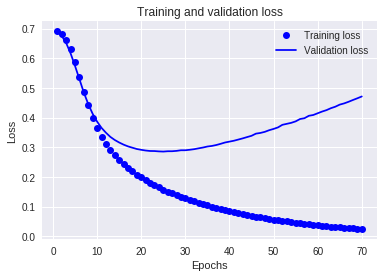

In [29]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

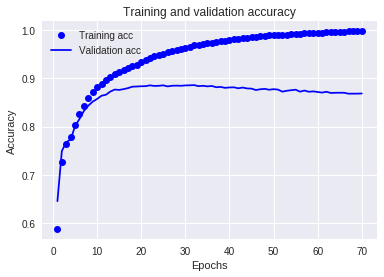

In [30]:
plt.clf()   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

*Notez* que la perte d’entraînement diminue à chaque époque et que la précision de l’entraînement augmente avec chaque époque. Ceci est attendu lorsque vous utilisez une optimisation de descente de gradient — cela devrait minimiser la quantité souhaitée à chaque itération. Ce n'est pas le cas pour la perte de validation et la précision - elles semblent culminer après une vingtaine d'époques. Ceci est un exemple de surajustement: le modèle fonctionne mieux sur les données d'apprentissage que sur des données qu'il n'a jamais vues auparavant. Après ce point, le modèle sur-optimise et apprend des représentations spécifiques aux données d'apprentissage qui ne se généralisent pas pour tester des données. Dans ce cas particulier, nous pourrions éviter les sur-ajustements en arrêtant simplement l'entraînement après une vingtaine d'époques. 

## RNN/LSTM

**Réseaux de neurones récurrents (RNN)**

Un réseau de neurones récurrent (voir Figure 1 ) est un réseau de neurones qui tente de modéliser un comportement dépendant du temps ou d'une séquence, tel que la langue, les cours des actions, la demande d'électricité, etc. Cette opération est effectuée en renvoyant la sortie d'une couche de réseau neuronal à l'instant t à l'entrée de la même couche de réseau à l'instant t + 1.

Long Short Term Memory networks - simplement appelés «LSTM» (Voir Figure 2) - sont un type particulier de RNN, capable d’apprendre des dépendances à long terme. Ils ont été introduits par Hochreiter et Schmidhuber (1997) et ont été affinés et popularisés par de nombreuses personnes dans les travaux suivants.1 Ils fonctionnent extrêmement bien sur une grande variété de problèmes et sont maintenant largement utilisés.

Les LSTM sont explicitement conçus pour éviter le problème de dépendance à long terme. Se souvenir des informations pendant de longues périodes est pratiquement leur comportement par défaut, ce n'est pas quelque chose qu'ils ont du mal à apprendre!

Tous les réseaux de neurones récurrents se présentent sous la forme d'une chaîne de modules répétitifs de réseau de neurones. Dans les RNN standard, ce module répétitif aura une structure très simple, telle qu’une seule couche *tanh* .



1.   Figure 1: RNN
![Figure 1: RNN](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png)
2.   Figure 2 : LSTM



![ Figure 2 : LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)


In [42]:
# fixer un random seed pour la reproductibilité
np.random.seed(7)
# charger le jeu de données mais ne garde que les n premiers mots, remet à zéro le reste
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pader les matrices pour éviter le problème de non compatibilité des dimensions
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# Créer le modele
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Evaluation du modèle 
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
25000/

On obtient au final une accuracy de 87.71%% avec  LSTM mais on perds beacoup on niveau de la compléxité temporelle.
